# Data Wrangling Fundamentals in Python

<div class="alert alert-info">
This notebook is intended only to provide an overview of the capabilities of the pandas package. More complete documentation can be found at
<ul>
<li><a href="http://pandas.pydata.org/pandas-docs/stable/merging.html">Pandas Data Merging</a></li>
</ul>
</div>

<div class="alert alert-danger">
You'll need to have an internet connection for portions of this notebook.
</div>

## Introduction

Data wrangling is a loosely defined process for manually converting or mapping data from one "raw" form into another format. The purpose of this wrangling is to recast the data into a format which either simplifies our processing chain or enables us to use tools which require a certain layout of the data. Typically data wrangling is one of the first steps in  the processing once we extract the data from the data source.

The process of wrangling can involve a broad variety of operations, such as sorting, filtering, or other operations. Many of these are covered elsewhere in our materials, so for the purposes of this chapter, we'll emphasize wrangling operations which involve reshaping data or combining multiple sets of data.

### Initialization of Notebook

In [1]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# in addition, it will be useful in general if we keep our plots "inline" within the notebook
%matplotlib inline

# finally, let's use a style that's a bit pretty than the default
mpl.style.use('ggplot')

## Reshaping Data

The data that we have in the iris.data.csv file is what's called "wide-format" data, meaning that each line in the file contains a column for each variable. Wide-format data is almost certainly what you're most familiar with, since it's the format most commonly used to organize tabular data in Excel and, frankly, the notion of arranging all of the variable into a single row to represent a single observation feels pretty natural.

In contrast, "long-format" data has a column for possible variable types and a column for the values of those variables. If you're like most people, then that description is probably pretty hard to get a handle on. To be honest, you're not alone. Frankly, it's much easier to actually see what long-format data looks like than it is to describe it, so why don't we work through a simple example.

Before we get started, let's make sure that we have a copy of our favorite DataFrame, the iris data set and remind ourselves of the layout of the data.

In [2]:
# Let's set up a URL to the file, which in this case is hosted on github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'iris/iris.data.csv'
url = base_url + data_url

# Now let's read the file
df = pd.read_csv(url)

# Finally, let's print the first few lines
print df.head(10)

   ID  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa
5   6           5.4          3.9           1.7          0.4  Iris-setosa
6   7           4.6          3.4           1.4          0.3  Iris-setosa
7   8           5.0          3.4           1.5          0.2  Iris-setosa
8   9           4.4          2.9           1.4          0.2  Iris-setosa
9  10           4.9          3.1           1.5          0.1  Iris-setosa


As you can see (and probably remember), each row has **all** of the data associated with our measurements for any one of the irises. Now, let's look at what happens if we convert this to long-format. In python, we do this using the *melt()* method.

In [3]:
# first, let's drop the ID column
df_noID = df.drop(['ID'],axis=1)

df_melt = pd.melt(df_noID,'Class', var_name='measurement')
print df_melt.head(10)

         Class   measurement  value
0  Iris-setosa  Sepal_Length    5.1
1  Iris-setosa  Sepal_Length    4.9
2  Iris-setosa  Sepal_Length    4.7
3  Iris-setosa  Sepal_Length    4.6
4  Iris-setosa  Sepal_Length    5.0
5  Iris-setosa  Sepal_Length    5.4
6  Iris-setosa  Sepal_Length    4.6
7  Iris-setosa  Sepal_Length    5.0
8  Iris-setosa  Sepal_Length    4.4
9  Iris-setosa  Sepal_Length    4.9


So, what just happened there? First, we dropped the ID variable. You'll probably be able to tell why in a moment, but just trust me on this for now. The more interesting operation was the *melt()*. The process of "melting" the original DataFrame essentially pulled apart the data and created a new representation. After the melt, we have a format where one or more columns are identifier variables (in this case the contents of the "Class" variable). The only other columns in the new DataFrame are columns containing “variable names” and “values”. If you're familiar with MS Excel pivot tables, this might feel like we did the inverse of a pivot table operation.  In this representation, each of the values in the table now appears on a separate row, whereas before all of the related variable were collected into a

So, why did we do this? First off, we'll often receive data in a format that doesn't lend itself to analysis. This can happen in a lot of ways, for instance:

* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.   
* A single observational unit is stored in multiple tables.

Melting the data is often the first step in reshaping the data into a format that is more amenable to analysis. Either we'll melt the data as an end unto itself, or we might use some of the other pandas operations (e.g. pivot or groupby) to reshape into a different form.

#### Wide-format versus long-format representations

So what kinds of analyses are particularly appropriate for wide format data. Well, as it turns out, most of the analyses that we've seen to this point work quite well with wide-format data. For instance, if we want to perform any form of visual or descriptive analysis of a single variable, wide-format data is extremely convenient since we have convenience methods that allow us to extract the data. For instance:



MEAN =  count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal_Width, dtype: float64






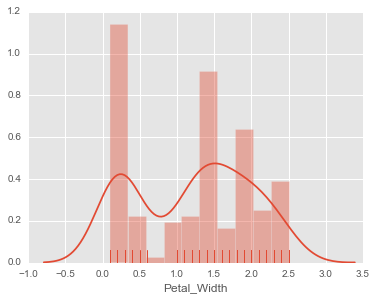

In [4]:
print "\n\nMEAN = ", df.Petal_Width.describe()

print "\n\n===============================\n\n"

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,4.5))

sns.distplot(df.Petal_Width, rug=True, bins=10);

Similarly, having columns representing distinct variables, all of which are taken from the same observation, makes it very easy to compare or manipulate those variables. For instance, we can easily create a scatter plot or measure the correlation of the variables:

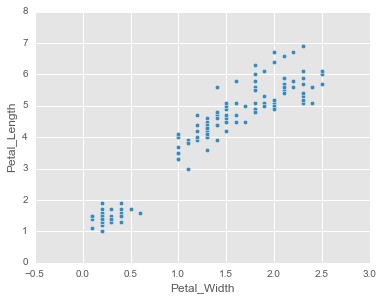

In [5]:
df.plot.scatter('Petal_Width', 'Petal_Length', figsize=(6,4.5));

In [6]:
# the pairwise correlation of each variable in the table
df.corr()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
ID,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal_Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.899759,0.817954,-0.356544,0.962757,1.000000


Now, consider this application of using the melted data. Notice one thing that happened as a result of the *melt()*: The variable names are now being treated as categorical variables in the new DataFrame. This can be exceptionally useful for exploratory analysis where we'd like to get a holistic view of all of the data in a single plot. For instance, consider a stripplot of all of the iris data as shown below;

Long-format data isn’t necessarily only two columns. For example, we might have ozone measurements for each day of the year. In that case, we could have another column for day. In other words, there are different levels of “longness”. The ultimate shape you want to get your data into will depend on what you are doing with it.

It turns out that you need wide-format data for some types of data analysis and long-format data for others. In reality, you need long-format data much more commonly than wide-format data.

Here, the process of melting the iris data has ended up with a DataFrame where we can use the original variable names to partition the measurements. By using the categorical identifier variable ("Class") to determine the hue of each datapoint, we can easily see that the Petal_Length and Petal_Width are separable for one of the classes of irises.

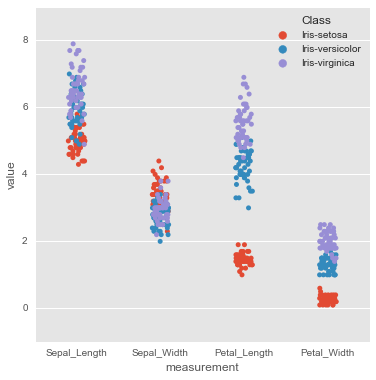

In [7]:
plt.figure(figsize=(6,6))
sns.stripplot(y='value', x='measurement', hue='Class', data=df_melt, jitter= True);

## Data Merging

We already saw how to

Let's recall the contents of our original wide-format DataFrame:

In [8]:
df.head(10)

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Now, what if we wanted to merge this data with some other data set, say a table that contained the prices for each class of iris. You could imagine that such a table might look like the following (although we wouldn't be generating the data randomly):

In [9]:
# some random price data
data = {'Class' : ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'iris-fakosa'],
        'price' : np.random.uniform(0,10,4)}
price_df = pd.DataFrame(data, columns=['Class', 'price'])
price_df

,Class,price
0,Iris-setosa,8.445750
1,Iris-versicolor,2.656640
2,Iris-virginica,4.276038
3,iris-fakosa,4.443325


### Merging Via a Join

Users of relational databases will be familiar with the terminology used to describe join operations between two table like structures, in our case DataFrame objects. There are several cases to consider which are very important to understand:

* one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
* many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
* many-to-many joins: joining columns on columns.

pandas supports the combination of DataFrames through the "join" operations that most people are familiar with from relational databases. One common type of join operation is the "inner join". The most general purpose method for performing this is the *merge()* operator, which supports the following types of operations

| merge method | SQL Join Name | Description | 
| :---: | :--- | :--- |
| left	| LEFT OUTER JOIN | 	Use keys from left frame only |
| right	| RIGHT OUTER JOIN | Use keys from right frame only | 
| outer	| FULL OUTER JOIN | Use union of keys from both frames | 
| inner	| INNER JOIN | Use intersection of keys from both frames |

In [10]:
# let's start by taking a random sample of the iris data so we can see a bit of diversity in the 'Class' variable
random_df = df.sample(n=10)
random_df

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
121,122,5.6,2.8,4.9,2.0,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


Now, using this sample of the data, let's join the price data to each row using the Class variable.

In [11]:
pd.merge(random_df, price_df, how='inner', on='Class').head(10)

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,price
0,122,5.6,2.8,4.9,2.0,Iris-virginica,4.276038
1,17,5.4,3.9,1.3,0.4,Iris-setosa,8.445750
2,6,5.4,3.9,1.7,0.4,Iris-setosa,8.445750
3,14,4.3,3.0,1.1,0.1,Iris-setosa,8.445750
4,23,4.6,3.6,1.0,0.2,Iris-setosa,8.445750
5,64,6.1,2.9,4.7,1.4,Iris-versicolor,2.656640
6,85,5.4,3.0,4.5,1.5,Iris-versicolor,2.656640
7,93,5.8,2.6,4.0,1.2,Iris-versicolor,2.656640
8,92,6.1,3.0,4.6,1.4,Iris-versicolor,2.656640
9,76,6.6,3.0,4.4,1.4,Iris-versicolor,2.656640


### Concatenating Additional Samples

Another very common way of combining datasets comes up when we obtain additional observations, or rows, which we want to append onto our existing dataset. To start, let's create a random set of observations.

As we do this, notice that although we have most of the same variables in our new data set, they're not exactly the same as the variables in our original dataset. For instance, our new data includes a new variable called *Petal_Color* but does not include *Sepal_Length*

In [12]:
# sample randomly generated samples of our new class of iris
data = {'Class' : ['Iris-fakosa'] * 5,
        'ID': range(200,205),
        'Sepal_Length' : np.random.uniform(0,10,5),
        'Sepal_Width' : np.random.uniform(0,10,5),
        'Petal_Length' : np.random.uniform(0,10,5),
        'Petal_Width' : np.random.uniform(0,10,5),
        'Petal_Color' : ['purple', 'green', 'red', 'yellow', 'yellow']}

more_samples_df = pd.DataFrame(data,columns=['Class',
                                             'ID',
                                            'Sepal_Width',
                                            'Petal_Length',
                                            'Petal_Width',
                                            'Petal_Color'])

more_samples_df

,Class,ID,Sepal_Width,Petal_Length,Petal_Width,Petal_Color
0,Iris-fakosa,200,0.753534,8.799253,7.087207,purple
1,Iris-fakosa,201,7.491913,4.357446,5.795929,green
2,Iris-fakosa,202,0.016549,5.431515,0.733553,red
3,Iris-fakosa,203,5.227505,8.780689,8.007606,yellow
4,Iris-fakosa,204,0.376939,1.372105,7.718716,yellow


Now, let's actually append the new data to the bottom of the original data.

In [13]:
random_df.append(more_samples_df).tail(20)

,Class,ID,Petal_Color,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
121,Iris-virginica,122,NaN,4.900000,2.000000,5.6,2.800000
16,Iris-setosa,17,NaN,1.300000,0.400000,5.4,3.900000
5,Iris-setosa,6,NaN,1.700000,0.400000,5.4,3.900000
63,Iris-versicolor,64,NaN,4.700000,1.400000,6.1,2.900000
84,Iris-versicolor,85,NaN,4.500000,1.500000,5.4,3.000000
13,Iris-setosa,14,NaN,1.100000,0.100000,4.3,3.000000
22,Iris-setosa,23,NaN,1.000000,0.200000,4.6,3.600000
92,Iris-versicolor,93,NaN,4.000000,1.200000,5.8,2.600000
91,Iris-versicolor,92,NaN,4.600000,1.400000,6.1,3.000000
75,Iris-versicolor,76,NaN,4.400000,1.400000,6.6,3.000000


As you can see, the *append()* was smart! It recognized the observations did not all include the same variables and left room appropriately in the table to represent that there was missing data. Furthermore, it used the NaN to represent the missing data so that any subsequent functions would recognize that the data was missing.